### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style("whitegrid", {'axes.grid' : False})

### Load Datasets

In [2]:
df_o21 = pd.read_csv('./../data/o21.csv', index_col=0)
df_o21.head()

,Tên,Trường,Tỉnh thành,Khởi động,VCNV,Tăng tốc,Về đích,Tổng điểm,Tuần,Tháng,Quý
0,Võ Phương Nam,THPT Chuyên Bảo Lộc,Lâm Đồng,80,30,120,25,255,1,1,1
1,Nguyễn Hoàng Khánh,THPT Bạch Đằng,Quảng Ninh,110,20,100,90,320,1,1,1
2,Đoàn Đặng Phương Nam,Phổ thông Năng khiếu,TP. Hồ Chí Minh,60,20,20,-60,40,1,1,1
3,Nguyễn Quang Huy,THPT Ngô Quyền - Ba Vì,Hà Nội,100,10,110,100,320,1,1,1
4,Lê Nguyên Hạo,THPT An Ninh,Long An,70,20,50,20,160,2,1,1


In [3]:
df_o20 = pd.read_csv('./../data/o20.csv', index_col=0)
df_o20.head()

,Tên,Trường,Tỉnh thành,Khởi động,VCNV,Tăng tốc,Về đích,Tổng điểm,Tuần,Tháng,Quý
0,Nguyễn Huy,THPT Chuyên Huỳnh Mẫn Đạt,Kiên Giang,50,10,140,10,210,1,1,1
1,Trần Phạm Anh Tuấn,THPT Lương Thế Vinh,Quảng Bình,50,90,90,5,235,1,1,1
2,Nguyễn Xuân Huy,THPT Thăng Long,Hà Nội,70,10,80,90,250,1,1,1
3,Nguyễn Tuấn Anh,THPT Triệu Quang Phục,Hưng Yên,80,10,70,-60,100,1,1,1
4,Hoàng Anh Quân,THPT Nguyễn Huệ,Thừa Thiên - Huế,90,10,150,110,360,2,1,1


In [4]:
df_o19 = pd.read_csv('./../data/o19.csv', index_col=0)
df_o19.head()

,Tên,Trường,Tỉnh thành,Khởi động,VCNV,Tăng tốc,Về đích,Tổng điểm,Tuần,Tháng,Quý
0,Cấn Thái Hoàng,THPT Thạch Thất,Hà Nội,60,50,160,20,290,1,1,1
1,Vũ Thành Vinh,THPT Hữu Lũng,Lạng Sơn,50,0,80,0,130,1,1,1
2,Lê Đức Thành,THPT Nguyễn Thị Minh Khai,Hà Tĩnh,80,0,70,-20,130,1,1,1
3,Đinh Đoàn Xuân Phương,THPT Chuyên Võ Nguyên Giáp,Quảng Bình,80,0,20,30,130,1,1,1
4,Bùi Hậu Giang,THPT Chuyên Lê Quý Đôn,Đà Nẵng,60,90,120,60,330,2,1,1


### EDA

In [5]:
max_point = max(df_o21['Tổng điểm'].max(), df_o20['Tổng điểm'].max(), df_o19['Tổng điểm'].max())
min_point = min(df_o21['Tổng điểm'].min(), df_o20['Tổng điểm'].min(), df_o19['Tổng điểm'].min())

In [6]:
mean_21 = df_o21['Tổng điểm'].mean()
mean_20 = df_o20['Tổng điểm'].mean()
mean_19 = df_o19['Tổng điểm'].mean()
median_21 = df_o21['Tổng điểm'].mode()
median_20 = df_o20['Tổng điểm'].mode()
median_19 = df_o19['Tổng điểm'].mode()

<IPython.core.display.Javascript object>


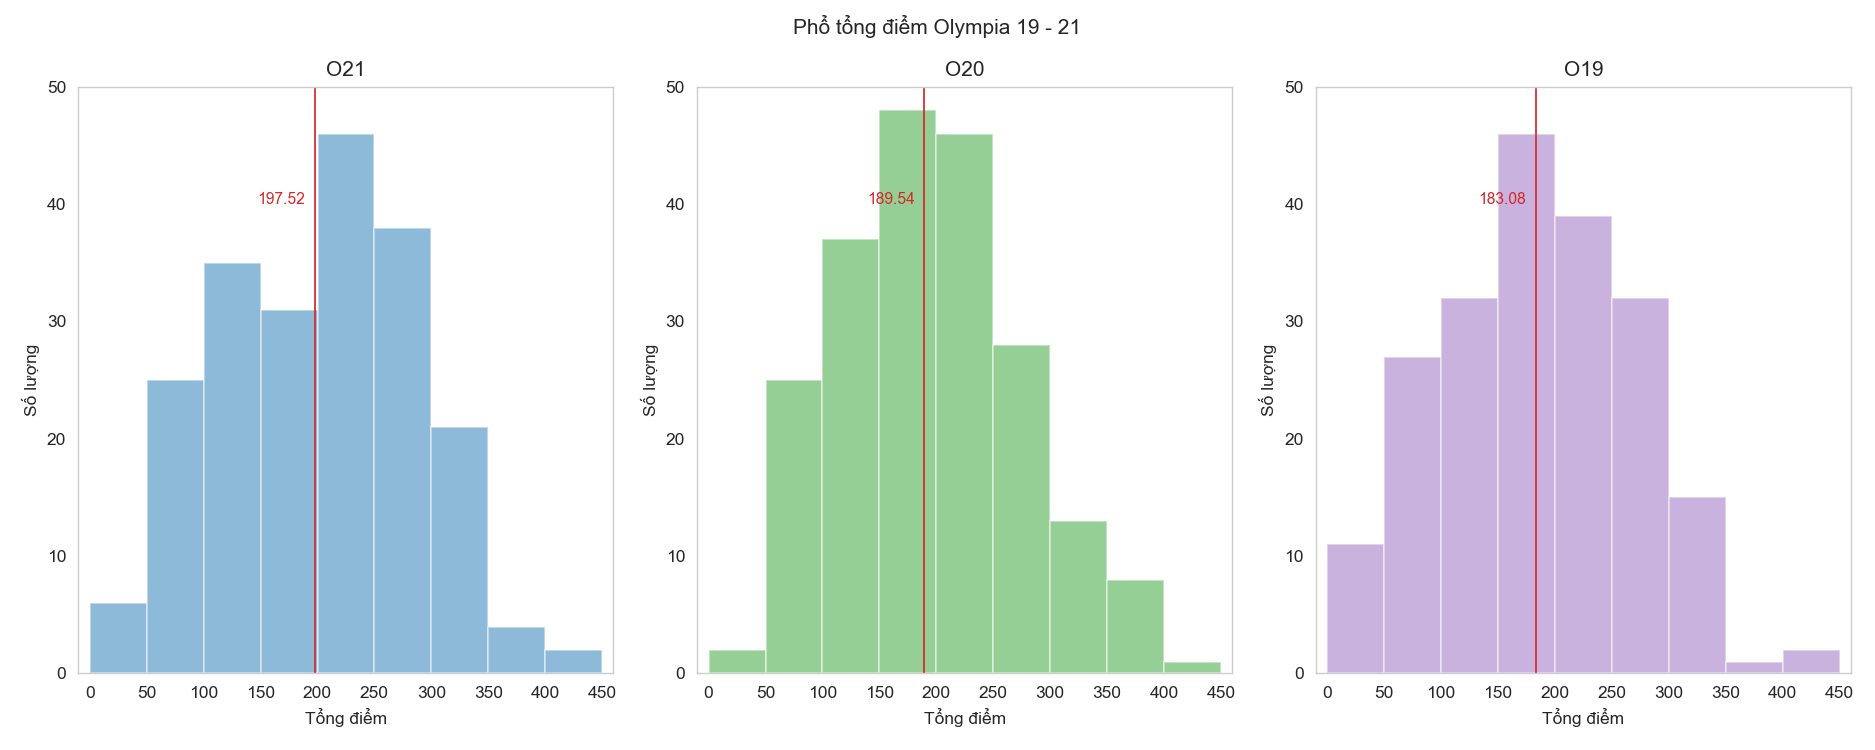

<ipython-input-7-7f4c70c0cc3b>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"hist1921.jpg", bbox_inches='tight', dpi=200, quality=95)


In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(15, 6))
axes = [ax1, ax2, ax3]
means = [mean_21, mean_20, mean_19]
medians = [median_21, median_20, median_19]
labels = ['O21', 'O20', 'O19']
bins=range(0, 470, 50)

ax1.hist(df_o21['Tổng điểm'], alpha=.5, color='tab:blue', bins=bins)
ax2.hist(df_o20['Tổng điểm'], alpha=.5, color='tab:green', bins=bins)
ax3.hist(df_o19['Tổng điểm'], alpha=.5, color='tab:purple', bins=bins)

for (index, ax) in enumerate(axes):
    ax.xaxis.set_label_text("Tổng điểm")
    ax.yaxis.set_label_text("Số lượng")
    ax.set_title(labels[index])
    ax.set_ylim([0, 50])
    ax.set_xticks(range(0, 470, 50))
    ax.axvline(means[index], color="tab:red", linestyle = '-', label="Điểm trung bình", linewidth=1)
    ax.annotate(round(means[index], 2), (int(means[index]) - 50, 40), fontsize=9, color="tab:red")

fig.suptitle("Phổ tổng điểm Olympia 19 - 21")
plt.xlim([min_point, max_point])
handles, labels = ax.get_legend_handles_labels()
plt.tight_layout()
plt.savefig("image.png", dpi=150)

plt.savefig(f"hist1921.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


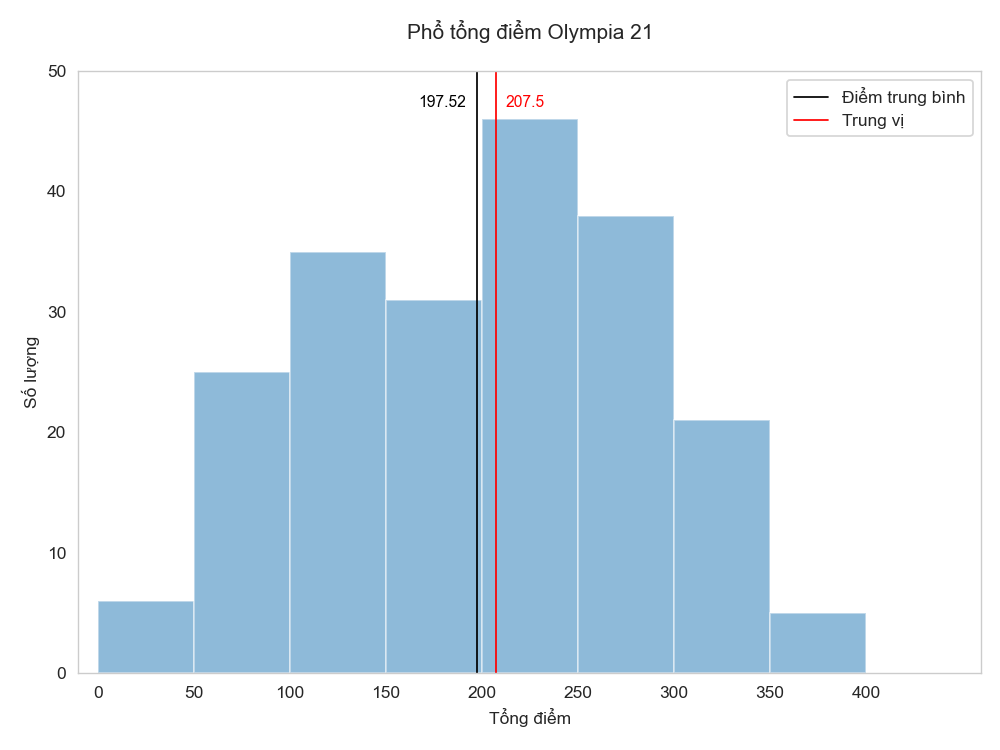

<ipython-input-8-d404724fda39>:38: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"hist21.jpg", bbox_inches='tight', dpi=200, quality=95)


In [8]:
o21_summary = df_o21["Tổng điểm"]
o21_matches = df_o21[["Tuần", "Tháng", "Quý"]]

means = []
medians = []
match_labels = []

#Calculate mean values
for i in range(1, 53):
    means.append(o21_summary[:i * 4].mean())
    medians.append(o21_summary[:i * 4].median())
    match_labels.append("{}{}{}".format(
            o21_matches.iloc[(i - 1) * 4]["Tuần"],
            o21_matches.iloc[(i - 1) * 4]["Tháng"],
            o21_matches.iloc[(i - 1) * 4]["Quý"],
    ))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

values, bins, patches = ax.hist(o21_summary, alpha=0.5, bins=range(0, 420, 50), color="tab:blue")
ax.xaxis.set_label_text("Tổng điểm")
ax.yaxis.set_label_text("Số lượng")
ax.set_title("Phổ tổng điểm Olympia 21\n")
ax.set_ylim([0, 50])
ax.set_xlim([min_point, max_point])
ax.set_xticks(range(0, 420, 50))
ax.axvline(o21_summary.mean(), color="black", linestyle = '-', label="Điểm trung bình", linewidth=1)
ax.annotate(round(o21_summary.mean(), 2), (int(o21_summary.mean()) - 30, 47), fontsize=9, color="black")
ax.axvline(o21_summary.median(), color="red", linestyle = '-', label="Trung vị", linewidth=1)
ax.annotate(o21_summary.median(), (o21_summary.median() + 5, 47), fontsize=9, color="red")
order = np.argsort(values)[::-1]
# for i in order[:1]:
#     ax.annotate(int(values[i]), (bins[i] + 18.5, values[i] - 2), fontsize=11, color="white")

ax.legend()
plt.tight_layout()

plt.savefig(f"hist21.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


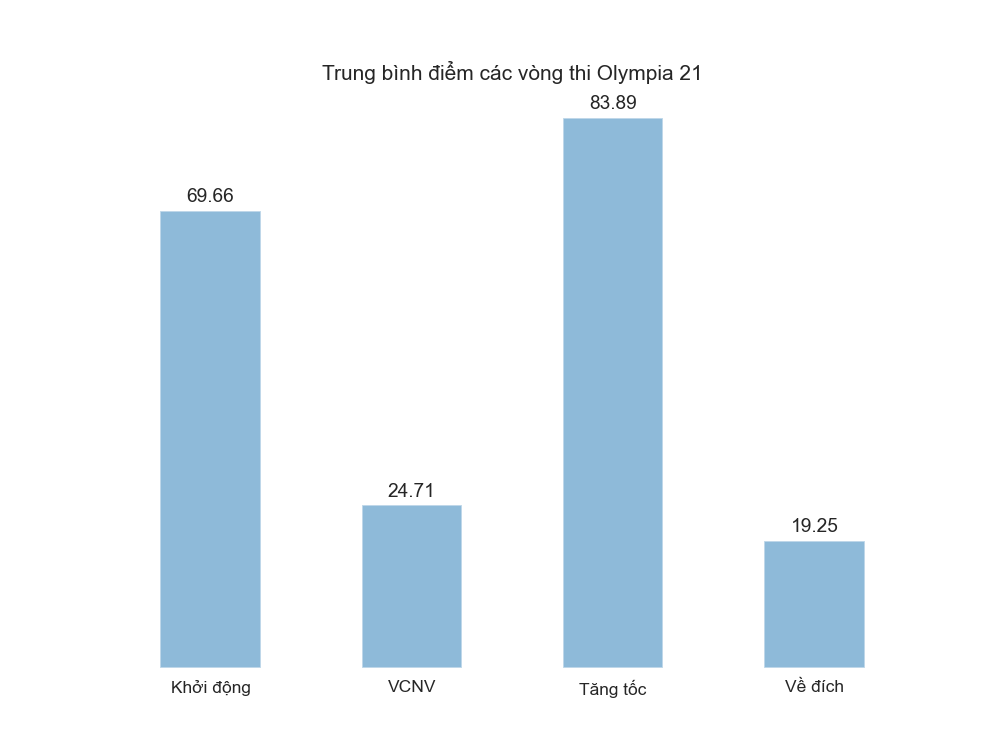

<ipython-input-9-c71cdccdc251>:24: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"avground.jpg", bbox_inches='tight', dpi=200, quality=95)


In [9]:
plt.figure(figsize=(8, 6))

#So sánh giữa các vòng thi
df_o21["%KĐ"] = df_o21["Khởi động"] / df_o21["Tổng điểm"]
df_o21["%VCNV"] = df_o21["VCNV"] / df_o21["Tổng điểm"]
df_o21["%TT"] = df_o21["Tăng tốc"] / df_o21["Tổng điểm"]
df_o21["%VĐ"] = df_o21["Về đích"] / df_o21["Tổng điểm"]

#df_mean = df_o21[["%KĐ", "%VCNV", "%TT", "%VĐ"]].mean(axis=0) * 100
df_mean = df_o21[["Khởi động", "VCNV", "Tăng tốc", "Về đích"]].mean(axis=0)
bars = plt.bar(df_mean.index, df_mean, width= 0.5, alpha=.5)
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.title("Trung bình điểm các vòng thi Olympia 21")
plt.yticks([])
plt.box(on=None)
plt.show()

plt.savefig(f"avground.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


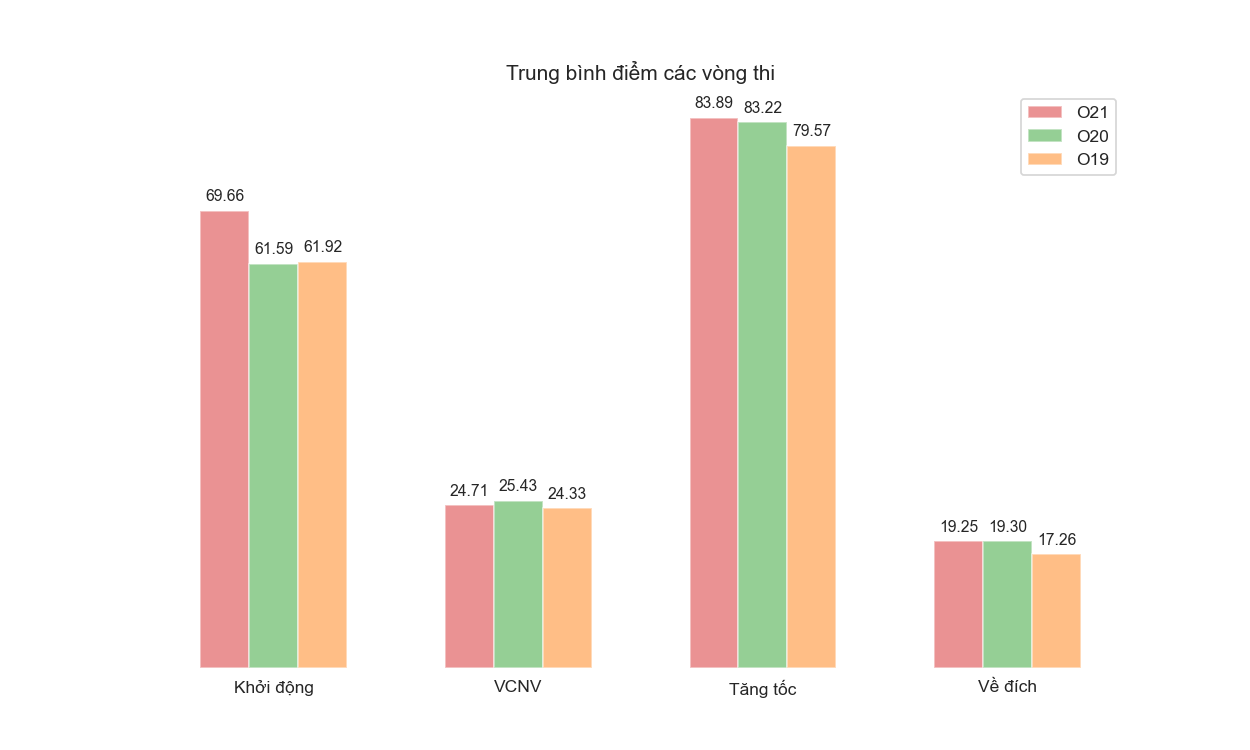

<ipython-input-10-3d3b6591864c>:49: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"avground1921.jpg", bbox_inches='tight', dpi=200, quality=95)


In [10]:
plt.figure(figsize=(10, 6))
df_list = [df_o20, df_o19]

#So sánh giữa các vòng thi
for df in df_list:
    df["%KĐ"] = df["Khởi động"] / df["Tổng điểm"]
    df["%VCNV"] = df["VCNV"] / df["Tổng điểm"]
    df["%TT"] = df["Tăng tốc"] / df["Tổng điểm"]
    df["%VĐ"] = df["Về đích"] / df["Tổng điểm"]

#df_mean = df_o21[["%KĐ", "%VCNV", "%TT", "%VĐ"]].mean(axis=0) * 100
df_mean_o20 = df_o20[["Khởi động", "VCNV", "Tăng tốc", "Về đích"]].mean(axis=0)
df_mean_o19 = df_o19[["Khởi động", "VCNV", "Tăng tốc", "Về đích"]].mean(axis=0)

X_axis = np.arange(4)

bars = plt.bar(X_axis - 0.2, df_mean, width= 0.2, color="tab:red", label="O21", alpha=0.5)
bars1 = plt.bar(X_axis, df_mean_o20, width= 0.2, color="tab:green", label="O20", alpha=0.5)
bars2 = plt.bar(X_axis + 0.2, df_mean_o19, width= 0.2, color="tab:orange", label="O19", alpha=0.5)

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
for bar in bars1.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
for bar in bars2.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(X_axis, ["Khởi động", "VCNV", "Tăng tốc", "Về đích"], rotation=0)
plt.title("Trung bình điểm các vòng thi")
plt.show()
plt.yticks([])
plt.box(on=None)
plt.legend()

plt.savefig(f"avground1921.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


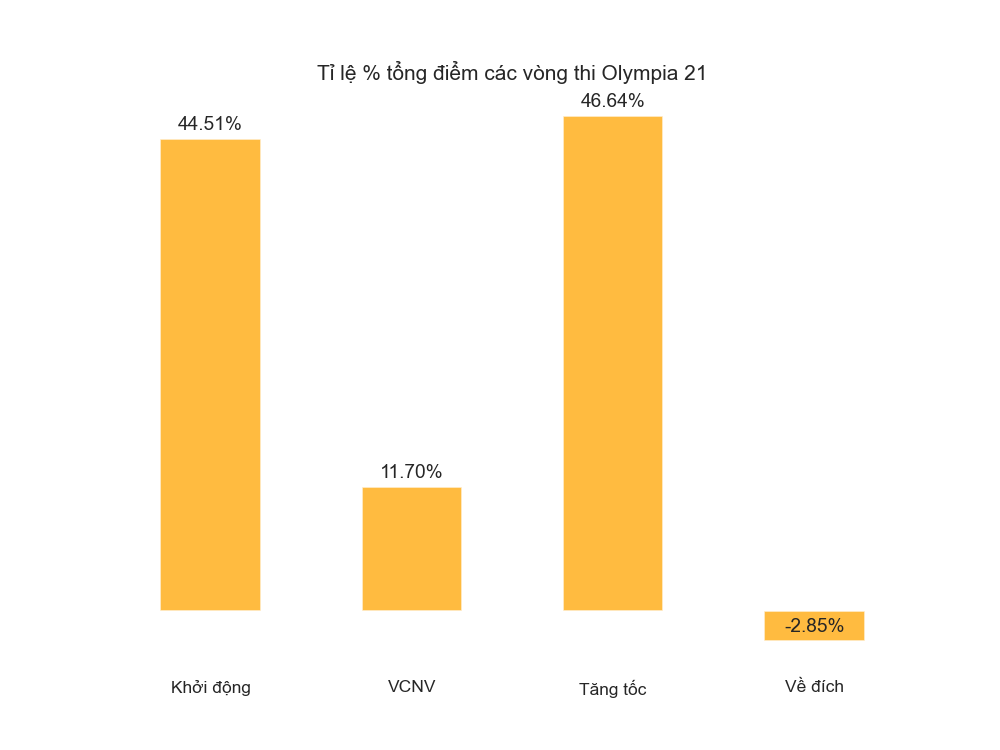

<ipython-input-11-2c2fe5793bd4>:18: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"percentageround.jpg", bbox_inches='tight', dpi=200, quality=95)


In [11]:
plt.figure(figsize=(8, 6))

df_mean_percentage = df_o21[["%KĐ", "%VCNV", "%TT", "%VĐ"]].mean(axis=0) * 100
df_mean_percentage.index = ["Khởi động", "VCNV", "Tăng tốc", "Về đích"]
bars = plt.bar(df_mean_percentage.index, df_mean_percentage, width= 0.5, alpha=.75, color="orange")
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f') + "%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=0)
plt.title("Tỉ lệ % tổng điểm các vòng thi Olympia 21")
plt.yticks([])
plt.box(on=None)
plt.show()

plt.savefig(f"percentageround.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


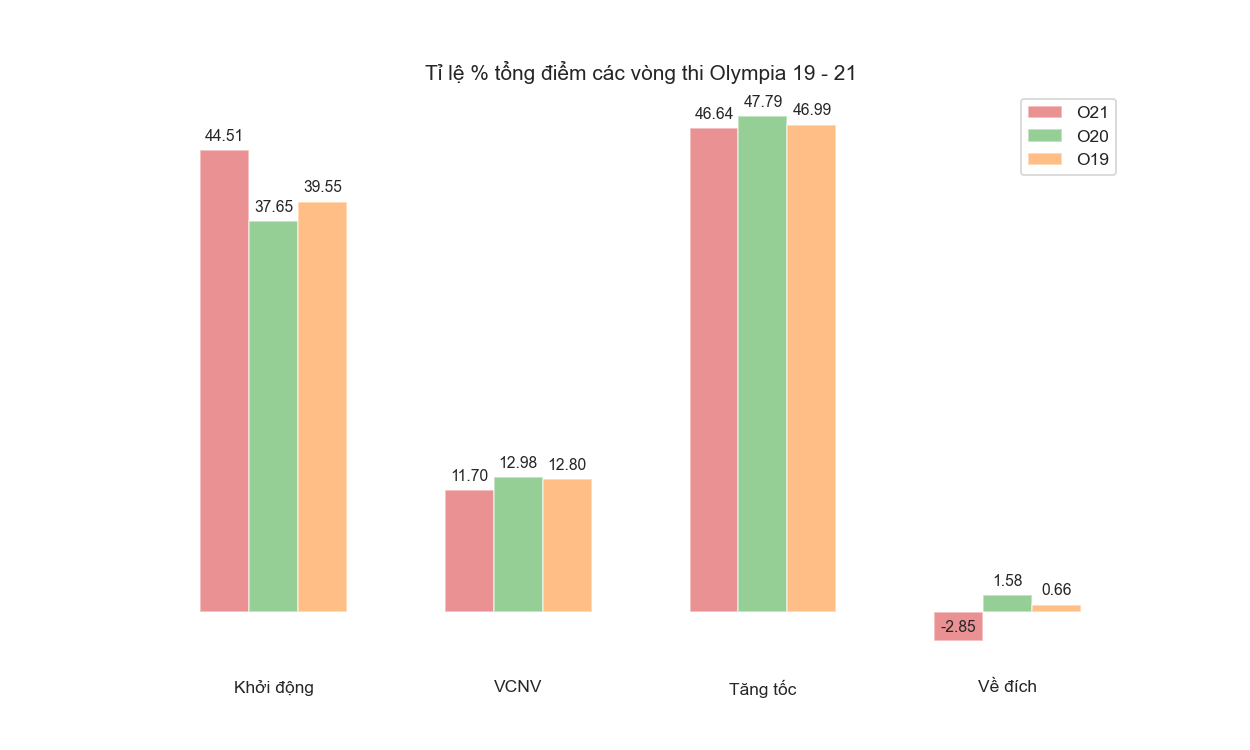

<ipython-input-12-0299cff49e05>:45: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"percentageround1921.jpg", bbox_inches='tight', dpi=200, quality=95)


In [12]:
plt.figure(figsize=(10, 6))

#df_mean = df_o21[["%KĐ", "%VCNV", "%TT", "%VĐ"]].mean(axis=0) * 100
df_o19_get = df_o19[df_o19["Tổng điểm"] != 0]
df_o19_get = df_o19_get[["%KĐ", "%VCNV", "%TT", "%VĐ"]]
df_mean_percentage_o19 = df_o19_get.mean(axis=0) * 100
df_o20_get = df_o20[df_o20["Tổng điểm"] != 0]
df_o20_get = df_o20_get[["%KĐ", "%VCNV", "%TT", "%VĐ"]]
df_mean_percentage_o20 = df_o20_get.mean(axis=0) * 100

X_axis = np.arange(4)

bars = plt.bar(X_axis - 0.2, df_mean_percentage, width= 0.2, color="tab:red", label="O21", alpha=0.5)
bars1 = plt.bar(X_axis, df_mean_percentage_o20, width= 0.2, color="tab:green", label="O20", alpha=0.5)
bars2 = plt.bar(X_axis + 0.2, df_mean_percentage_o19, width= 0.2, color="tab:orange", label="O19", alpha=0.5)

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
for bar in bars1.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
for bar in bars2.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(X_axis, ["Khởi động", "VCNV", "Tăng tốc", "Về đích"], rotation=0)
plt.title("Tỉ lệ % tổng điểm các vòng thi Olympia 19 - 21")
plt.show()
plt.yticks([])
plt.box(on=None)
plt.legend()

plt.savefig(f"percentageround1921.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


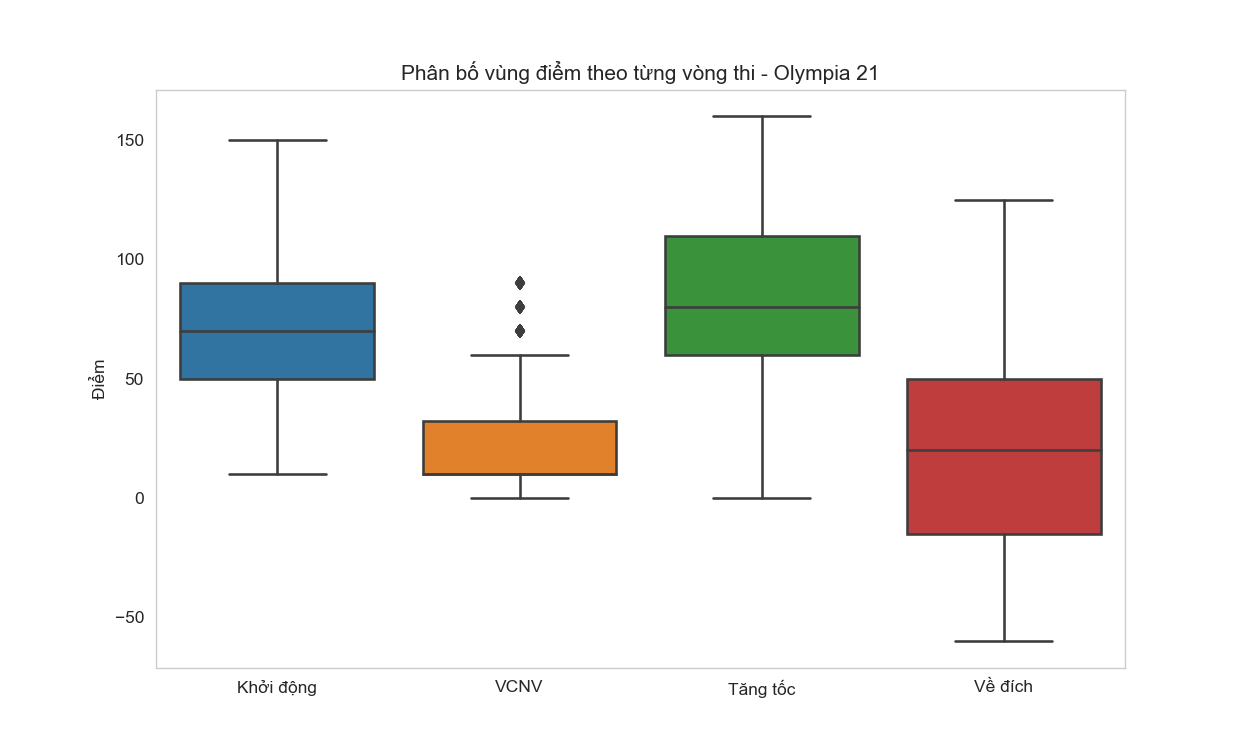

<ipython-input-13-94aaa4967328>:8: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"box21.jpg", bbox_inches='tight', dpi=200, quality=95)


In [13]:
plt.figure(figsize=(10, 6))

sns.boxplot(data = df_o21[["Khởi động", "VCNV", "Tăng tốc", "Về đích"]])
plt.title("Phân bố vùng điểm theo từng vòng thi - Olympia 21")
plt.ylabel("Điểm")
plt.show()

plt.savefig(f"box21.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


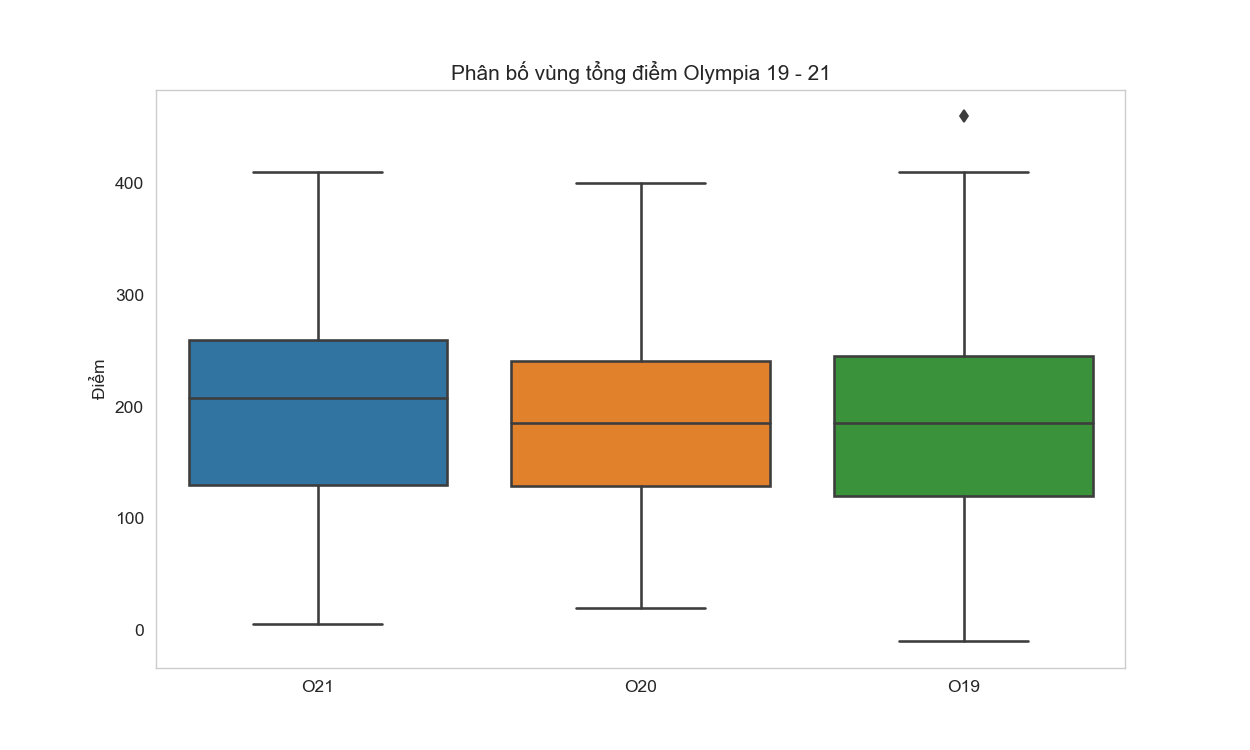

<ipython-input-14-a96d65e7ed90>:14: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"box19-21.jpg", bbox_inches='tight', dpi=200, quality=95)


In [14]:
plt.figure(figsize=(10, 6))

df_3_years = pd.DataFrame({
    "O21": df_o21["Tổng điểm"],
    "O20": df_o20["Tổng điểm"],
    "O19": df_o19["Tổng điểm"]
})

sns.boxplot(data = df_3_years)
plt.title("Phân bố vùng tổng điểm Olympia 19 - 21")
plt.ylabel("Điểm")
plt.show()

plt.savefig(f"box19-21.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


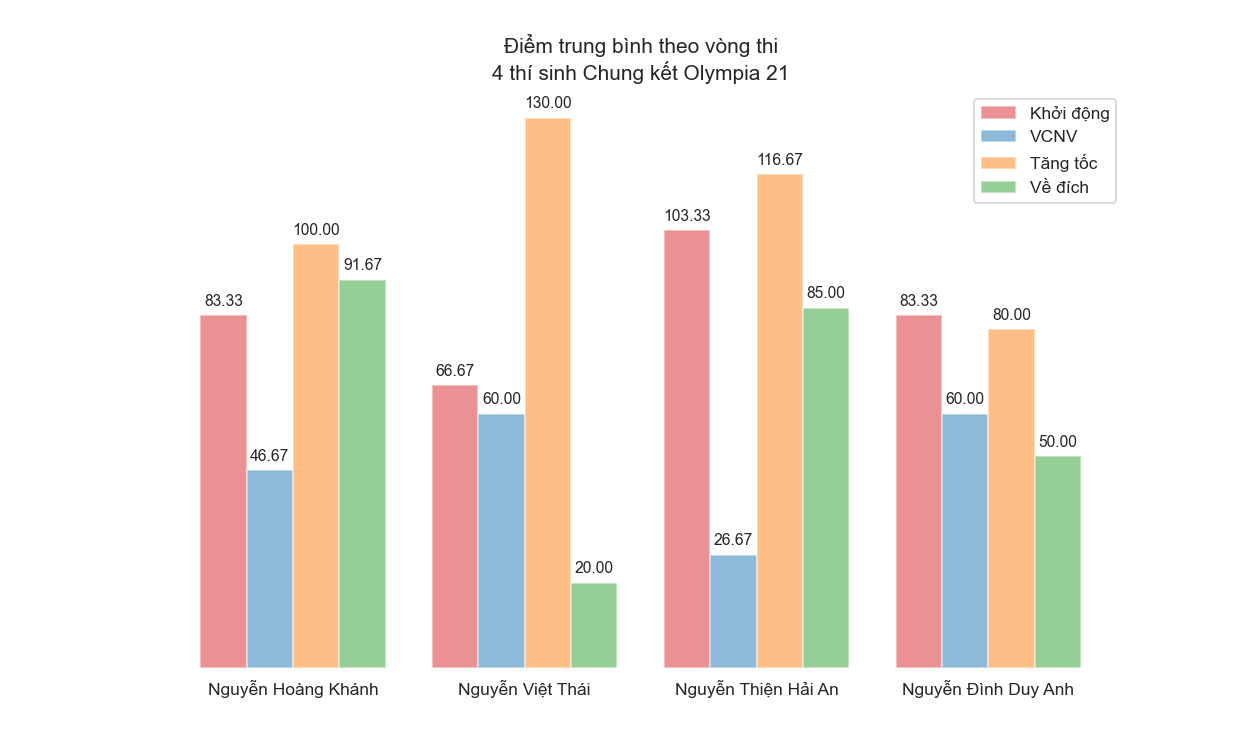

<ipython-input-15-80958119dcc6>:32: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"finalist21.jpg", bbox_inches='tight', dpi=200, quality=95)


In [15]:
plt.figure(figsize=(10, 6))

finalists = ["Nguyễn Hoàng Khánh", "Nguyễn Việt Thái", "Nguyễn Thiện Hải An", "Nguyễn Đình Duy Anh"]
df_finalists = df_o21[df_o21["Tên"].isin(finalists)]
df_finalists_mean = df_finalists.groupby("Tên").mean()
df_finalists_mean = df_finalists_mean[["Khởi động", "VCNV", "Tăng tốc", "Về đích", "Tổng điểm", "Quý"]]
df_finalists_mean.sort_values(by="Quý", inplace=True)

X_axis = np.arange(4)

bar1 = plt.bar(X_axis - 0.3, df_finalists_mean["Khởi động"], label="Khởi động", width= 0.2, color="tab:red", alpha=0.5)
bar2 = plt.bar(X_axis - 0.1, df_finalists_mean["VCNV"], label="VCNV", width= 0.2, color="tab:blue", alpha=0.5)
bar3 = plt.bar(X_axis + 0.1, df_finalists_mean["Tăng tốc"], label="Tăng tốc", width= 0.2, color="tab:orange", alpha=0.5)
bar4 = plt.bar(X_axis + 0.3, df_finalists_mean["Về đích"], label="Về đích", width= 0.2, color="tab:green", alpha=0.5)

bar_list = [bar1, bar2, bar3, bar4]
for bar_group in bar_list:
    for bar in bar_group.patches:
        plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Điểm trung bình theo vòng thi\n4 thí sinh Chung kết Olympia 21")
plt.xticks(X_axis, finalists, rotation=0)
plt.yticks([])
plt.box(on=None)
plt.legend()
plt.show()

plt.savefig(f"finalist21.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


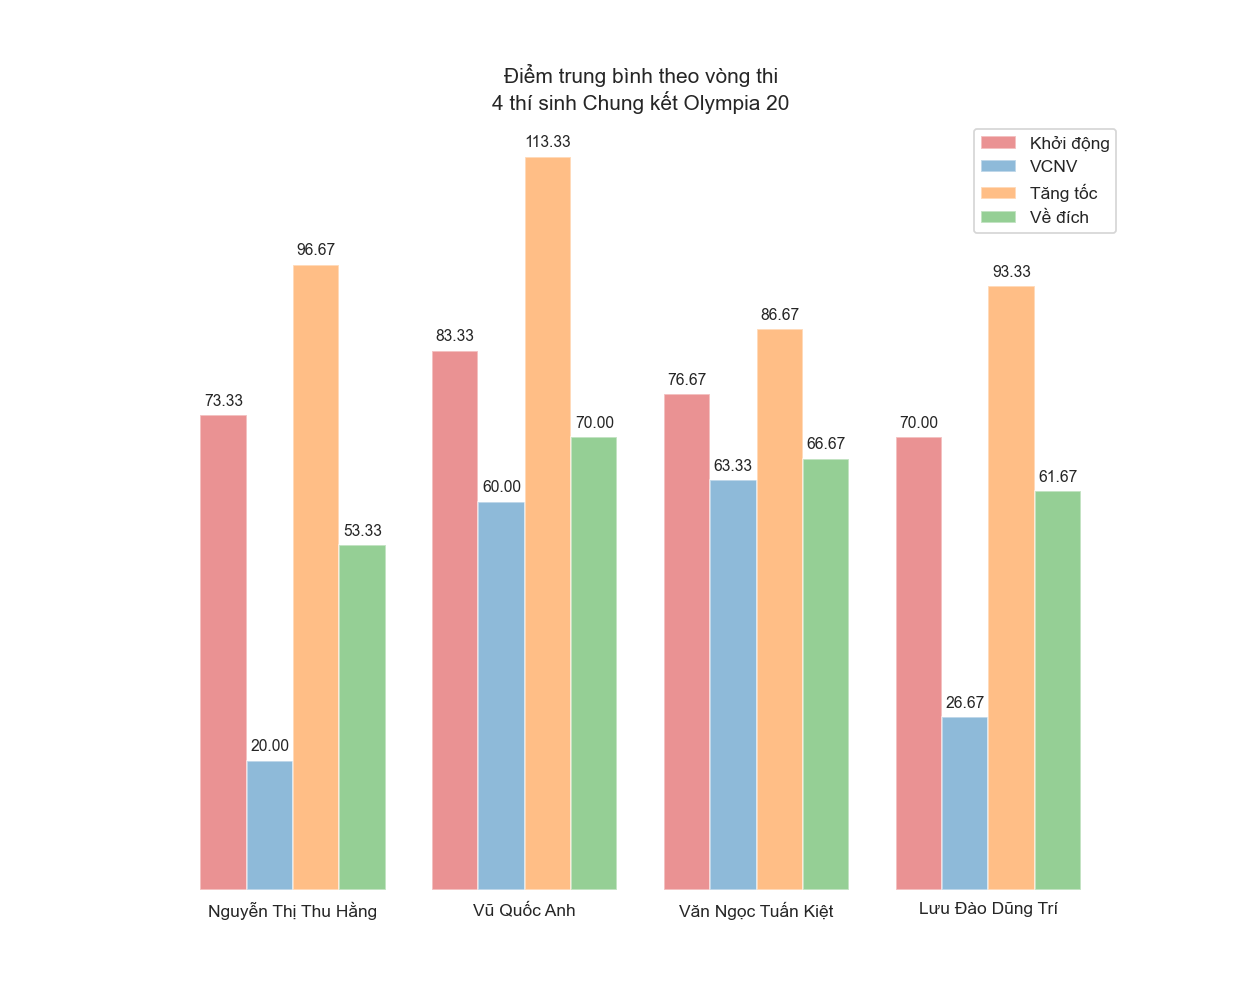

<ipython-input-16-7be4d469787e>:32: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"finalist20.jpg", bbox_inches='tight', dpi=200, quality=95)


In [16]:
finalists_o20 = ["Nguyễn Thị Thu Hằng", "Vũ Quốc Anh", "Văn Ngọc Tuấn Kiệt", "Lưu Đào Dũng Trí"]
df_finalists_o20 = df_o20[df_o20["Tên"].isin(finalists_o20)]
df_finalists_mean = df_finalists_o20.groupby("Tên").mean()
df_finalists_mean = df_finalists_mean[["Khởi động", "VCNV", "Tăng tốc", "Về đích", "Tổng điểm", "Quý"]]
df_finalists_mean.sort_values(by="Quý", inplace=True)
df_finalists_mean
plt.figure(figsize=(10, 8))

X_axis = np.arange(4)

bar1 = plt.bar(X_axis - 0.3, df_finalists_mean["Khởi động"], label="Khởi động", width= 0.2, color="tab:red", alpha=0.5)
bar2 = plt.bar(X_axis - 0.1, df_finalists_mean["VCNV"], label="VCNV", width= 0.2, color="tab:blue", alpha=0.5)
bar3 = plt.bar(X_axis + 0.1, df_finalists_mean["Tăng tốc"], label="Tăng tốc", width= 0.2, color="tab:orange", alpha=0.5)
bar4 = plt.bar(X_axis + 0.3, df_finalists_mean["Về đích"], label="Về đích", width= 0.2, color="tab:green", alpha=0.5)

bar_list = [bar1, bar2, bar3, bar4]
for bar_group in bar_list:
    for bar in bar_group.patches:
        plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Điểm trung bình theo vòng thi\n4 thí sinh Chung kết Olympia 20")
plt.xticks(X_axis, finalists_o20, rotation=0)
plt.legend(loc="best")
plt.yticks([])
plt.box(on=None)
plt.show()

plt.savefig(f"finalist20.jpg", bbox_inches='tight', dpi=200, quality=95)

In [17]:
finalists_o19 = ["Trần Thế Trung", "Nguyễn Hải Đăng", "Nguyễn Bá Vinh", "Đoàn Nam Thắng"]
df_finalists_o19 = df_o19[df_o19["Tên"].isin(finalists_o19)]
df_finalists_o19.groupby("Tên").mean()

,Khởi động,VCNV,Tăng tốc,Về đích,Tổng điểm,Quý,%KĐ,%VCNV,%TT,%VĐ
Tên,,,,,,,,,,
Nguyễn Bá Vinh,80.000000,70.000000,126.666667,70.000000,346.666667,3.0,0.238294,0.207811,0.387402,0.166492
Nguyễn Hải Đăng,86.666667,16.666667,73.333333,68.333333,245.000000,2.0,0.356903,0.068489,0.291924,0.282684
Trần Thế Trung,83.333333,36.666667,66.666667,88.333333,275.000000,1.0,0.308678,0.127082,0.240209,0.324031
Đoàn Nam Thắng,63.333333,50.000000,93.333333,46.666667,253.333333,4.0,0.245714,0.208889,0.360000,0.185397


<IPython.core.display.Javascript object>


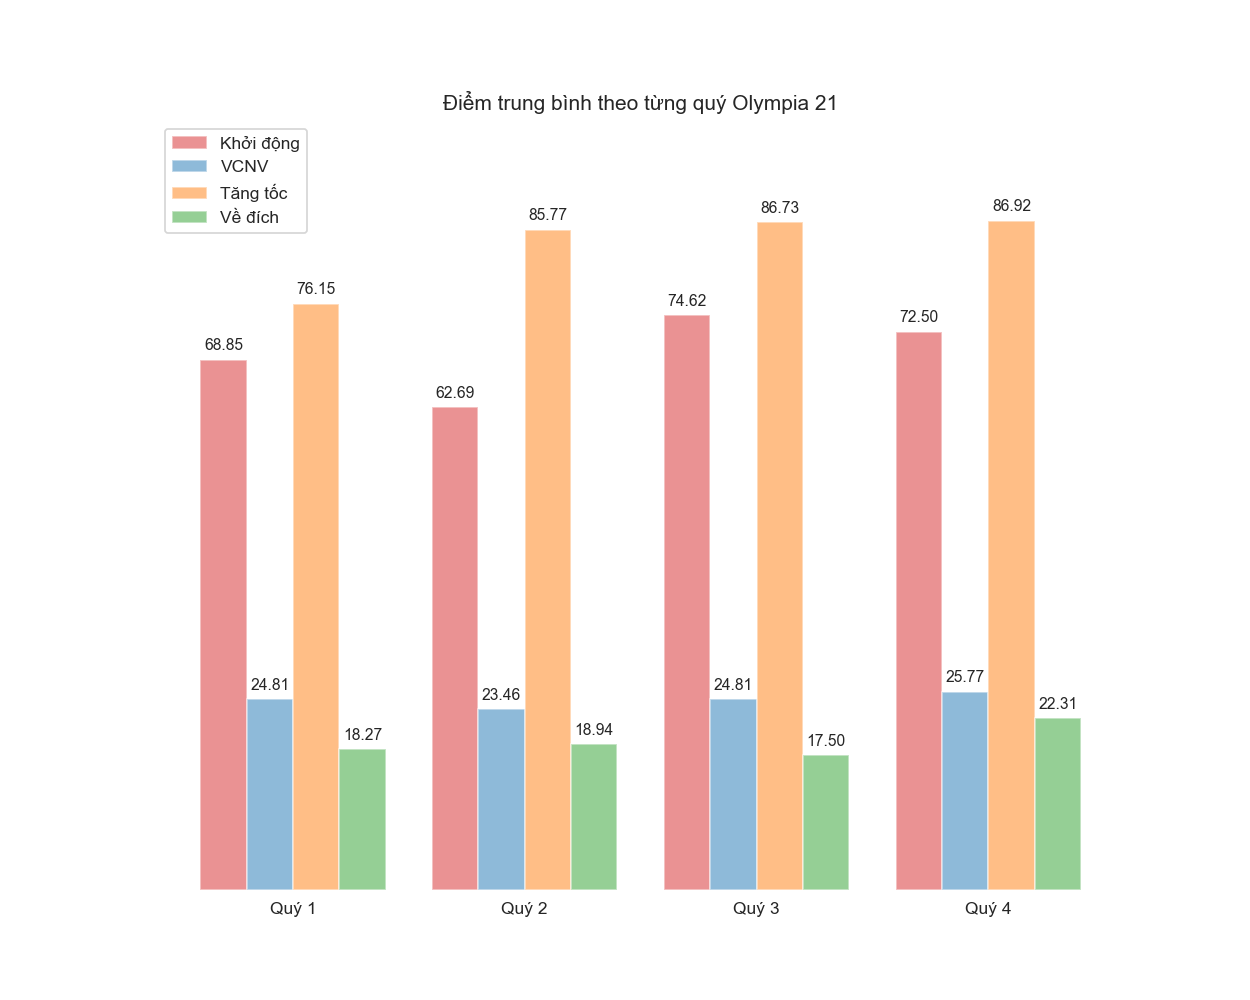

<ipython-input-18-388080bc0f68>:29: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"avground.jpg", bbox_inches='tight', dpi=200, quality=95)


In [18]:
df_quarter_mean = df_o21.groupby("Quý").mean()
df_quarter_mean
plt.figure(figsize=(10, 8))

X_axis = np.arange(4)

bar1 = plt.bar(X_axis - 0.3, df_quarter_mean["Khởi động"], label="Khởi động", width= 0.2, color="tab:red", alpha=0.5)
bar2 = plt.bar(X_axis - 0.1, df_quarter_mean["VCNV"], label="VCNV", width= 0.2, color="tab:blue", alpha=0.5)
bar3 = plt.bar(X_axis + 0.1, df_quarter_mean["Tăng tốc"], label="Tăng tốc", width= 0.2, color="tab:orange", alpha=0.5)
bar4 = plt.bar(X_axis + 0.3, df_quarter_mean["Về đích"], label="Về đích", width= 0.2, color="tab:green", alpha=0.5)

bar_list = [bar1, bar2, bar3, bar4]
for bar_group in bar_list:
    for bar in bar_group.patches:
        plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Điểm trung bình theo từng quý Olympia 21")
plt.xticks(X_axis, ["Quý " + str(i) for i in range(1, 5)], rotation=0)
plt.ylim([0, 100])
plt.legend(loc="best")
plt.yticks([])
plt.box(on=None)
plt.show()

plt.savefig(f"avground.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


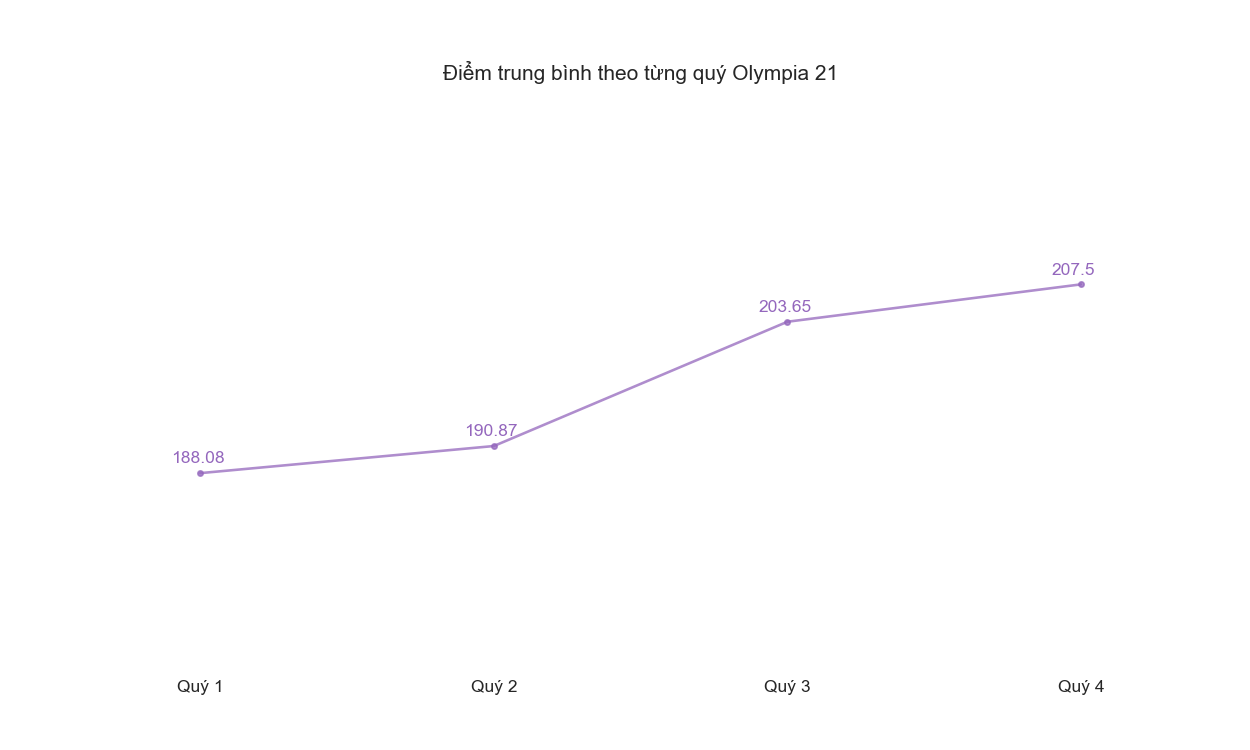

In [19]:
df_quarter_mean = df_o21.groupby("Quý").mean()
plt.figure(figsize=(10, 6))

X_axis = np.arange(4) + 1

line1 = plt.plot(df_quarter_mean["Tổng điểm"], color="tab:purple", alpha=.75, marker=".", label="O21")

for (index, value) in enumerate(list(df_quarter_mean["Tổng điểm"])):
    plt.annotate(round(value, 2), (X_axis[index] - .1, value + 1), color="tab:purple")

    
plt.title("Điểm trung bình theo từng quý Olympia 21")
plt.xticks(df_quarter_mean.index, ["Quý " + str(i) for i in range(1, 5)], rotation=0)
plt.ylim([df_quarter_mean["Tổng điểm"].min() - 20, df_quarter_mean["Tổng điểm"].max() + 20])
plt.yticks([])
plt.box(on=None)
plt.show()

<IPython.core.display.Javascript object>


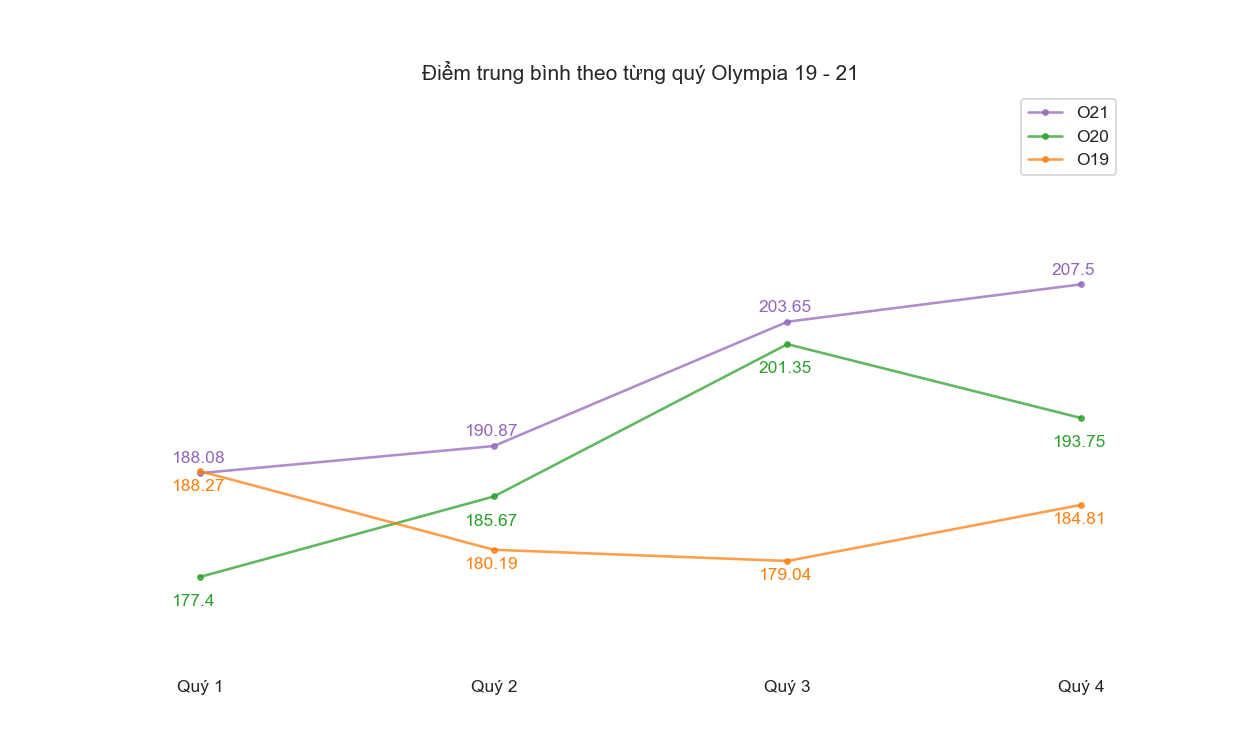

In [20]:
df_quarter_mean = df_o21.groupby("Quý").mean()
df_quarter_mean1 = df_o20.groupby("Quý").mean()
df_quarter_mean2 = df_o19.groupby("Quý").mean()
plt.figure(figsize=(10, 6))

X_axis = np.arange(4) + 1

line1 = plt.plot(df_quarter_mean["Tổng điểm"], color="tab:purple", alpha=.75, marker=".", label="O21")
line2 = plt.plot(df_quarter_mean1["Tổng điểm"], color="tab:green", alpha=.75, marker=".", label="O20")
line3 = plt.plot(df_quarter_mean2["Tổng điểm"], color="tab:orange", alpha=.75, marker=".", label="O19")

for (index, value) in enumerate(list(df_quarter_mean["Tổng điểm"])):
    plt.annotate(round(value, 2), (X_axis[index] - .1, value + 1), color="tab:purple")
    
for (index, value) in enumerate(list(df_quarter_mean1["Tổng điểm"])):
    plt.annotate(round(value, 2), (X_axis[index] - .1, value - 3), color="tab:green")
    
for (index, value) in enumerate(list(df_quarter_mean2["Tổng điểm"])):
    plt.annotate(round(value, 2), (X_axis[index] - .1, value - 2), color="tab:orange")
    
plt.title("Điểm trung bình theo từng quý Olympia 19 - 21")
plt.xticks(df_quarter_mean.index, ["Quý " + str(i) for i in range(1, 5)], rotation=0)
plt.ylim([df_quarter_mean["Tổng điểm"].min() - 20, df_quarter_mean["Tổng điểm"].max() + 20])
plt.yticks([])
plt.box(on=None)
plt.legend()
plt.show()

In [21]:
df_o21["Tỉnh thành"] = df_o21["Tỉnh thành"].replace("Bà Rịa - Vũng Tàu", "Bà Rịa – Vũng Tàu")

df_tmp = df_o21[["Tỉnh thành", "Tổng điểm"]]
df_avg_point = df_tmp.groupby("Tỉnh thành").mean()
df_avg_point.sort_values(by="Tổng điểm", ascending=False)
df_avg_point.to_csv("avg.csv")

In [22]:
df_tmp = df_o21[["Tỉnh thành", "Tuần", "Tháng", "Quý"]]
df_week = df_tmp[df_tmp["Tuần"] != "X"].groupby("Tỉnh thành").size()
df_month = df_tmp[(df_tmp["Tuần"] == "X") & (df_tmp["Tháng"] != "X")].groupby("Tỉnh thành").size()
df_quarter = df_tmp[(df_tmp["Tuần"] == "X") & (df_tmp["Tháng"] == "X")].groupby("Tỉnh thành").size()

df_week.to_csv("week.csv")
df_month.to_csv("month.csv")
df_quarter.to_csv("quarter.csv")

In [23]:
'''
import scipy.stats as ss
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

def cramers_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

from scipy.stats import chi2_contingency
def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

confusion_matrix = pd.crosstab(df_tmp["Rank"], df_tmp["Rank_After_TT"])
print(cramers_corrected_stat(confusion_matrix))
print(cramers_stat(confusion_matrix))
print(cramers_V(df_tmp["Rank"], df_tmp["Rank_After_TT"]))
'''

'\nimport scipy.stats as ss\ndef cramers_corrected_stat(confusion_matrix):\n    chi2 = ss.chi2_contingency(confusion_matrix)[0]\n    n = confusion_matrix.sum().sum()\n    phi2 = chi2/n\n    r,k = confusion_matrix.shape\n    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    \n    rcorr = r - ((r-1)**2)/(n-1)\n    kcorr = k - ((k-1)**2)/(n-1)\n    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))\n\ndef cramers_stat(confusion_matrix):\n    chi2 = ss.chi2_contingency(confusion_matrix)[0]\n    n = confusion_matrix.sum()\n    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))\n\nfrom scipy.stats import chi2_contingency\ndef cramers_V(var1,var2):\n    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building\n    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test\n    obs = np.sum(crosstab) # Number of observations\n    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of 

In [24]:
!pip install association-metrics


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [25]:
!pip install researchpy

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [26]:
import researchpy as rp

corrs = []
first_placements = []

In [27]:
def count_first_placements(df):
    count_final_1 = 0
    count_final_2 = 0
    count_final_3 = 0
    count_final_4 = 0
    for index, rank in enumerate(list(df_tmp["Rank"])):
        if rank == 1:
            if list(df["Rank_After_TT"])[index] == 1:
                count_final_1 += 1
            if list(df["Rank_After_TT"])[index] == 2:
                count_final_2 += 1
            if list(df["Rank_After_TT"])[index] == 3:
                count_final_3 += 1
            if list(df["Rank_After_TT"])[index] == 4:
                count_final_4 += 1

    return (count_final_1, count_final_2, count_final_3, count_final_4)

In [28]:
def corr(df):
    ctab, chitest, expected = rp.crosstab(df["Rank"], df["Rank_After_TT"],
                                     margins=False, test="chi-square", expected_freqs=True)
    return chitest.loc[2, "results"]

In [29]:
#O21

rank_after_TT = []
ranks = []

for i in range(52):
    mini_df = df_o21[i * 4 : i * 4 + 4]
    mini_df["Sum_3_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"]
    mini_df["Sum_4_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"] + mini_df["Về đích"]
    mini_df["Rank_After_TT"] = mini_df['Sum_3_Round'].rank(method='min', ascending=False)
    mini_df["Rank"] = mini_df['Sum_4_Round'].rank(method='min', ascending=False)
    rank_after_TT.append(list(mini_df["Rank_After_TT"].astype("int64")))
    ranks.append(list(mini_df["Rank"].astype("int64")))
    
rank_after_TT_array = np.array(rank_after_TT).reshape(208,).tolist()
rank_array = np.array(ranks).reshape(208,).tolist()

df_tmp = df_o21.copy()
df_tmp["Rank_After_TT"] = np.array(rank_after_TT).reshape(208,).tolist()
df_tmp["Rank"] = np.array(rank_array).reshape(208,).tolist()
df_tmp.groupby("Rank_After_TT").mean()

corrs.append(corr(df_tmp))
first_placements.append(count_first_placements(df_tmp))

<ipython-input-29-a50a93799261>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df["Sum_3_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"]
<ipython-input-29-a50a93799261>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df["Sum_4_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"] + mini_df["Về đích"]
<ipython-input-29-a50a93799261>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [30]:
#O20

rank_after_TT = []
ranks = []

for i in range(52):
    mini_df = df_o20[i * 4 : i * 4 + 4]
    mini_df["Sum_3_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"]
    mini_df["Sum_4_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"] + mini_df["Về đích"]
    mini_df["Rank_After_TT"] = mini_df['Sum_3_Round'].rank(method='min', ascending=False)
    mini_df["Rank"] = mini_df['Sum_4_Round'].rank(method='min', ascending=False)
    rank_after_TT.append(list(mini_df["Rank_After_TT"].astype("int64")))
    ranks.append(list(mini_df["Rank"].astype("int64")))
    
rank_after_TT_array = np.array(rank_after_TT).reshape(208,).tolist()
rank_array = np.array(ranks).reshape(208,).tolist()

df_tmp = df_o20.copy()
df_tmp["Rank_After_TT"] = np.array(rank_after_TT).reshape(208,).tolist()
df_tmp["Rank"] = np.array(rank_array).reshape(208,).tolist()
df_tmp.groupby("Rank_After_TT").mean()

corrs.append(corr(df_tmp))
first_placements.append(count_first_placements(df_tmp))

<ipython-input-30-c9b1fbfc5ca7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df["Sum_3_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"]
<ipython-input-30-c9b1fbfc5ca7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df["Sum_4_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"] + mini_df["Về đích"]
<ipython-input-30-c9b1fbfc5ca7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [31]:
#O19

rank_after_TT = []
ranks = []

for i in range(52):
    mini_df = df_o19[i * 4 : i * 4 + 4]
    mini_df["Sum_3_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"]
    mini_df["Sum_4_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"] + mini_df["Về đích"]
    mini_df["Rank_After_TT"] = mini_df['Sum_3_Round'].rank(method='min', ascending=False)
    mini_df["Rank"] = mini_df['Sum_4_Round'].rank(method='min', ascending=False)
    rank_after_TT.append(list(mini_df["Rank_After_TT"].astype("int64")))
    ranks.append(list(mini_df["Rank"].astype("int64")))
    
rank_after_TT_array = np.array(rank_after_TT).reshape(208,).tolist()
rank_array = np.array(ranks).reshape(208,).tolist()

df_tmp = df_o19.copy()
df_tmp["Rank_After_TT"] = np.array(rank_after_TT).reshape(208,).tolist()
df_tmp["Rank"] = np.array(rank_array).reshape(208,).tolist()
df_tmp.groupby("Rank_After_TT").mean()

corrs.append(corr(df_tmp))
first_placements.append(count_first_placements(df_tmp))

<ipython-input-31-fa879834545f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df["Sum_3_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"]
<ipython-input-31-fa879834545f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df["Sum_4_Round"] = mini_df["Khởi động"] + mini_df["VCNV"] + mini_df["Tăng tốc"] + mini_df["Về đích"]
<ipython-input-31-fa879834545f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

<IPython.core.display.Javascript object>


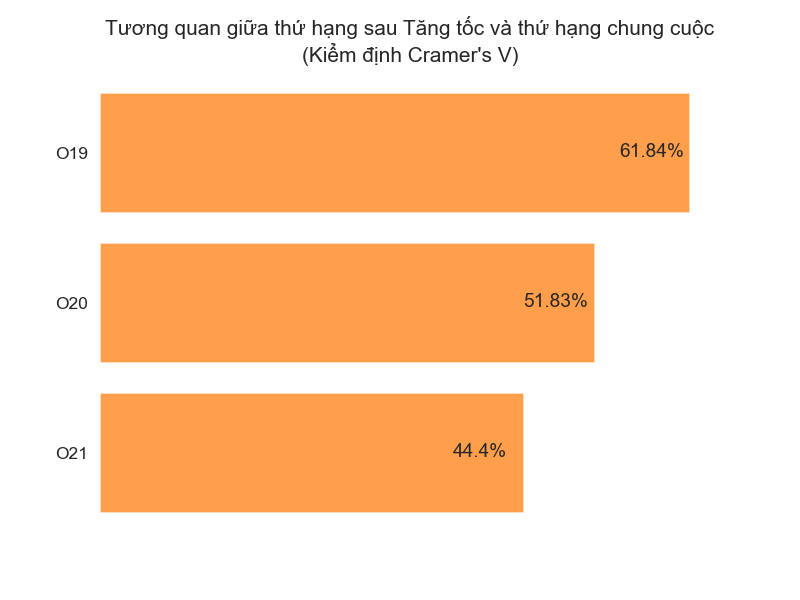

<ipython-input-32-2245111ffa51>:12: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"corr.jpg", bbox_inches='tight', dpi=200, quality=95)


In [32]:
plt.figure()
corrs_tmp = [val * 100 for val in corrs]
Y = np.arange(3)
plt.barh(width=corrs_tmp, y=Y, color="tab:orange", alpha=.75)
for (index, val) in enumerate(corrs_tmp):
    plt.annotate(f"{round(val, 2)}%", (val - 7.5, Y[index] - .025), fontsize=11)
plt.yticks(Y, ["O21", "O20", "O19"])
plt.xticks([])
plt.title("Tương quan giữa thứ hạng sau Tăng tốc và thứ hạng chung cuộc\n(Kiểm định Cramer's V)")
plt.box(on=None)

plt.savefig(f"corr.jpg", bbox_inches='tight', dpi=200, quality=95)

In [33]:
locations = [1, 2, 3, 4] * 52
corr2 = []

df_tmp = df_o21.copy()
df_tmp["Location"] = locations
df_o21_mean = df_tmp.groupby("Location").mean()

df_tmp = df_o20.copy()
df_tmp["Location"] = locations
df_o20_mean = df_tmp.groupby("Location").mean()

df_tmp = df_o19.copy()
df_tmp["Location"] = locations
df_o19_mean = df_tmp.groupby("Location").mean()

df_tmp = {
    "O21": df_o21_mean["Về đích"],
    "O20": df_o20_mean["Về đích"],
    "O19": df_o19_mean["Về đích"]
}
df_tmp

{'O21': Location
 1    25.865385
 2    15.769231
 3    19.423077
 4    15.961538
 Name: Về đích, dtype: float64,
 'O20': Location
 1    18.846154
 2    13.942308
 3    20.192308
 4    24.230769
 Name: Về đích, dtype: float64,
 'O19': Location
 1    17.307692
 2    15.961538
 3    16.923077
 4    18.846154
 Name: Về đích, dtype: float64}

<IPython.core.display.Javascript object>


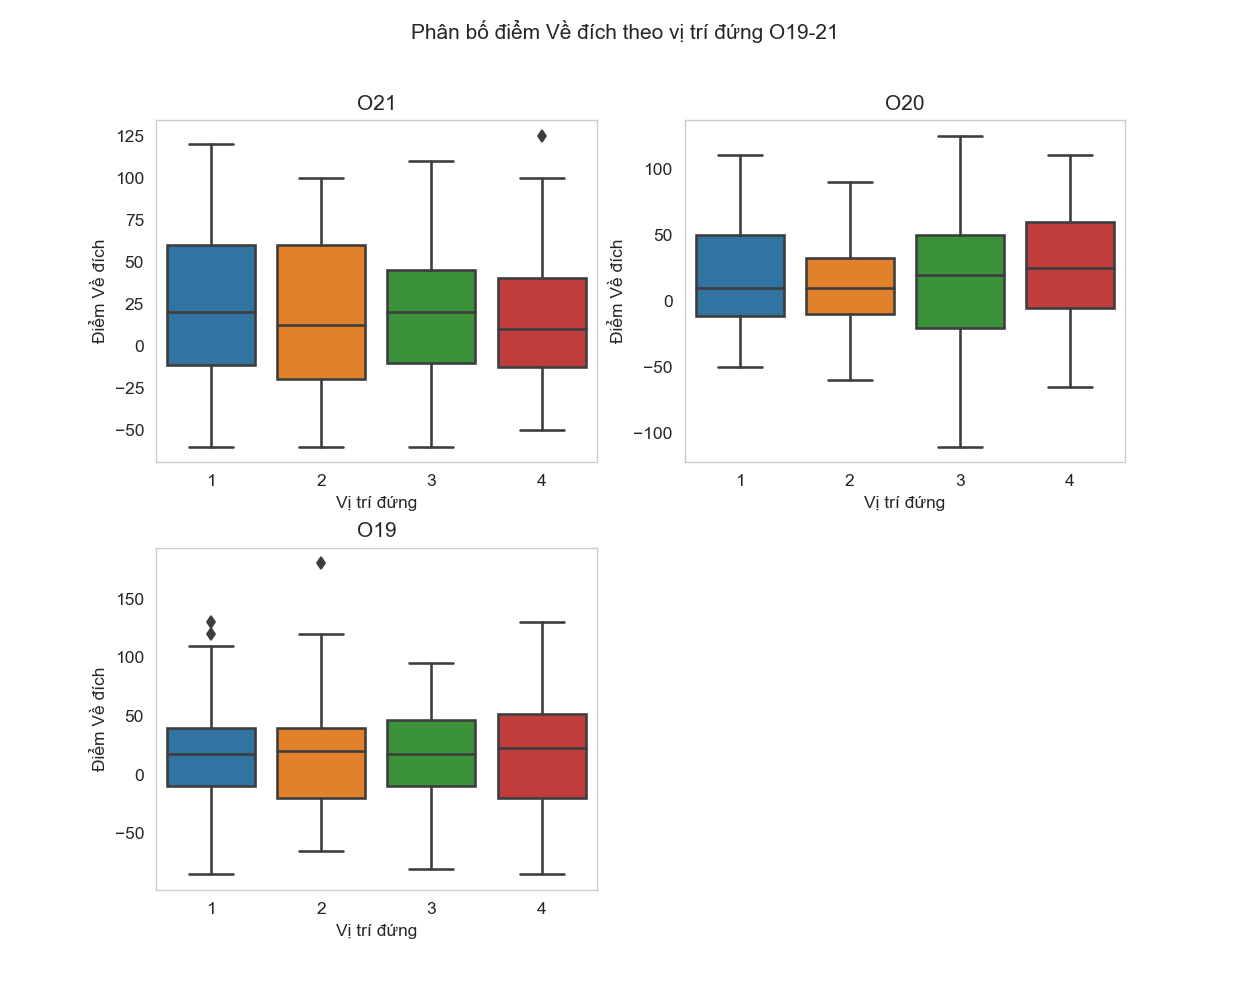

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8)) 

df_tmp = df_o21.copy()
df_tmp["Location"] = locations
sns.boxplot(df_tmp["Location"], df_tmp["Về đích"], ax=ax1)

df_tmp = df_o20.copy()
df_tmp["Location"] = locations
sns.boxplot(df_tmp["Location"], df_tmp["Về đích"], ax=ax2)

df_tmp = df_o19.copy()
df_tmp["Location"] = locations
sns.boxplot(df_tmp["Location"], df_tmp["Về đích"], ax=ax3)

for (index, ax) in enumerate([ax1, ax2, ax3]):
    ax.set_title(["O21", "O20", "O19"][index])
    ax.set_xlabel("Vị trí đứng")
    ax.set_ylabel("Điểm Về đích")
    
ax4.axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)
fig.suptitle("Phân bố điểm Về đích theo vị trí đứng O19-21")

plt.savefig(f"VDpoint.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


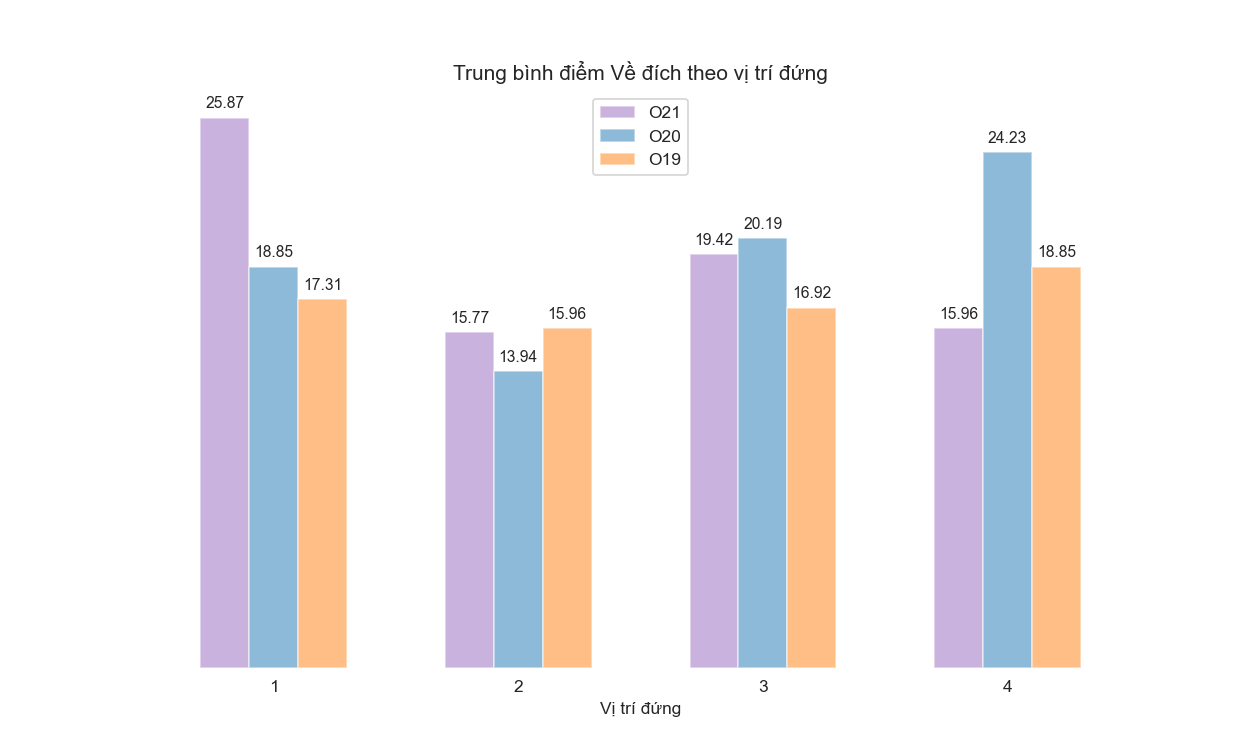

<ipython-input-35-a7f9b403b92f>:44: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"vdlocation.jpg", bbox_inches='tight', dpi=200, quality=95)


In [35]:
df_mean_vd = {
    "O21": df_o21_mean["Về đích"],
    "O20": df_o20_mean["Về đích"],
    "O19": df_o19_mean["Về đích"]
}

plt.figure(figsize=(10, 6))

X_axis = np.arange(4)

bars = plt.bar(X_axis - 0.2, df_mean_vd["O21"], width= 0.2, color="tab:purple", label="O21", alpha=0.5)
bars1 = plt.bar(X_axis, df_mean_vd["O20"], width= 0.2, color="tab:blue", label="O20", alpha=0.5)
bars2 = plt.bar(X_axis + 0.2, df_mean_vd["O19"], width= 0.2, color="tab:orange", label="O19", alpha=0.5)

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
for bar in bars1.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
for bar in bars2.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(X_axis, [1, 2, 3, 4], rotation=0)
plt.title("Trung bình điểm Về đích theo vị trí đứng")
plt.show()
plt.yticks([])
plt.box(on=None)
plt.legend(loc=9)
plt.xlabel("Vị trí đứng")

plt.savefig(f"vdlocation.jpg", bbox_inches='tight', dpi=200, quality=95)

<IPython.core.display.Javascript object>


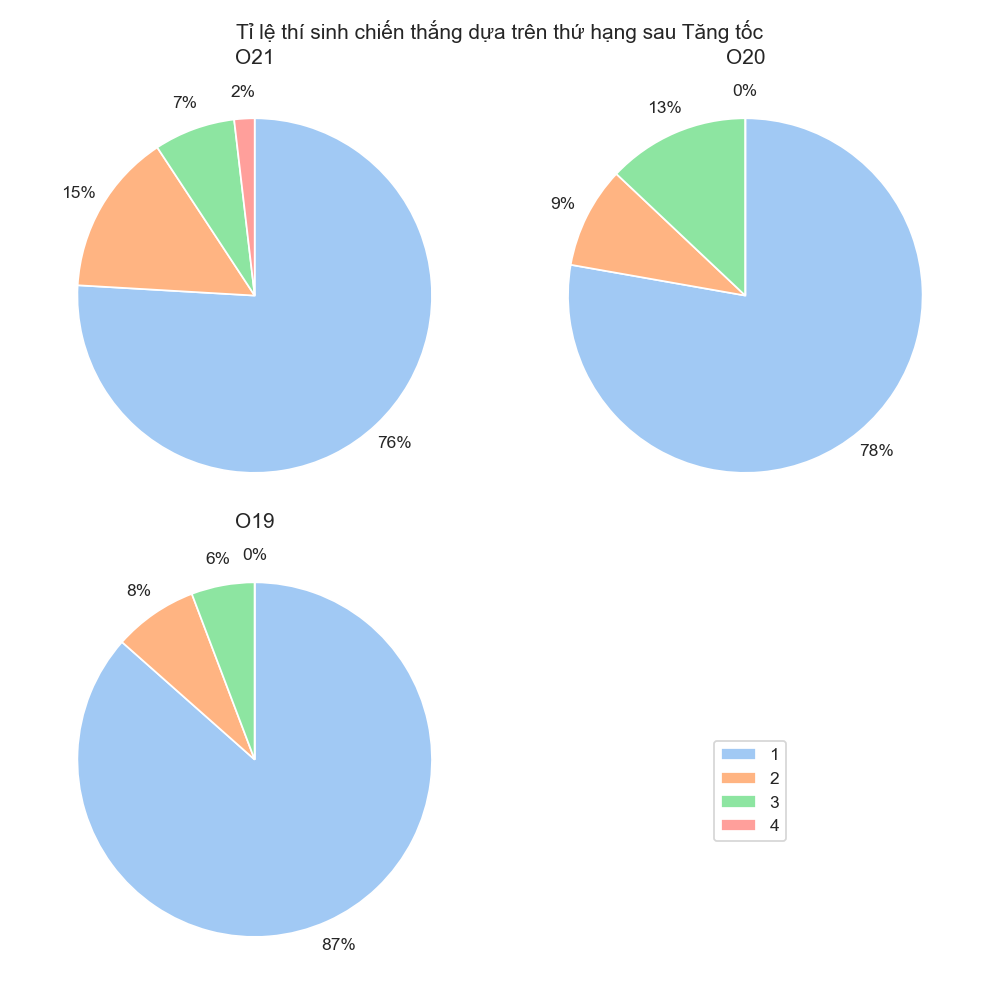

<ipython-input-81-a965c46c1120>:29: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(f"TTVD.jpg", bbox_inches='tight', dpi=200, quality=95)


In [81]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8)) 

for (index, ax) in enumerate([ax1, ax2, ax3]):
    ax.set_title(["O21", "O20", "O19"][index])
    if ax == ax1:
        ax.pie(x = list(first_placements[index]), 
               labels=[1, 2, 3, 4], 
               colors = sns.color_palette('pastel')[:4], 
               autopct='%.0f%%',
               startangle = 90,
               labeldistance=None,
               pctdistance=1.15,
               counterclock=False)
    else:
        ax.pie(x = list(first_placements[index]), 
               colors = sns.color_palette('pastel')[:4], 
               autopct='%.0f%%',
               startangle = 90,
               labeldistance=None,
               pctdistance=1.15,
               counterclock=False)
        
ax4.axis('off')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.05)
fig.suptitle("Tỉ lệ thí sinh chiến thắng dựa trên thứ hạng sau Tăng tốc")
fig.legend(bbox_to_anchor=(0.75, 0.15), loc='lower center')
fig.tight_layout()

plt.savefig(f"TTVD.jpg", bbox_inches='tight', dpi=200, quality=95)

In [ ]:
import matplotlib.animation as animation

'''
means.append(means[-1])
medians.append(medians[-1])
match_labels.append(match_labels[-1])
'''

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

def update(curr):
    if curr == n:
        a.event_source.stop()
    else:
        ax.cla()
        values, bins, patches = ax.hist(o21_summary[:curr * 4], alpha=0.5, color='tab:green', bins=range(0, 420, 50))
        ax.xaxis.set_label_text("Tổng điểm")
        ax.yaxis.set_label_text("Số lượng")
        ax.set_title("Thay đổi phổ điểm theo từng trận Olympia 21\n" + "111 - " + match_labels[curr])
        ax.set_ylim([0, 50])
        ax.set_xlim([min_point, max_point])
        ax.set_xticks(range(0, 420, 50))
        ax.axvline(means[curr], color="black", linestyle = '-', label="Điểm trung bình", linewidth=1)
        ax.annotate(round(means[curr], 2), (int(means[curr]) - 30, 47), fontsize=9, color="black")
        ax.axvline(medians[curr], color="red", linestyle = '-', label="Trung vị", linewidth=1)
        ax.annotate(medians[curr], (medians[curr] + 5, 47), fontsize=9, color="tab:red")
        order = np.argsort(values)[::-1]
#         for i in order[:1]:
#             ax.annotate(int(values[i]), (bins[i] + 18.5, values[i] - 2), fontsize=11, color="tab:yellow")
        

        ax.legend()
        plt.tight_layout()
    
n = 52
a = animation.FuncAnimation(fig, update, interval= 200) 


In [ ]:
my_writer=animation.PillowWriter(fps=3, codec='libx264', bitrate=2)
a.save(filename='o21.gif', writer=my_writer)